(540, 2500) (540,)


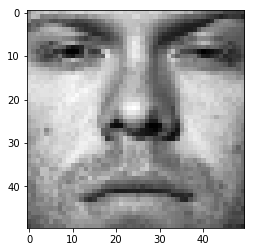

In [2]:
#1.(b) load the data
import numpy as np
from scipy import misc
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

# load train data
train_labels, train_data = [], []
for line in open('/Users/yingzhu/Desktop/faces/train.txt'):
    readline = line.strip().split()[0]
    im = misc.imread('/Users/yingzhu/Desktop'+readline[1:])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

# load test data
test_labels, test_data = [], []
for line in open('/Users/yingzhu/Desktop/faces/test.txt'):
    readline = line.strip().split()[0]
    im = misc.imread('/Users/yingzhu/Desktop'+readline[1:])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

# display train example
print(train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

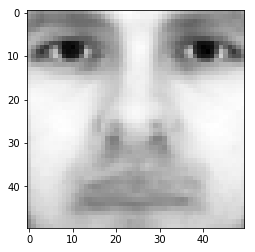

In [3]:
# 1.(c) AVERAG Face
# Average face for train
Average_face_train = np.mean(train_data,axis=0)
Average_reshape_train=Average_face_train.reshape(50,50)
plt.imshow(Average_reshape_train,cmap=cm.Greys_r)
plt.show()

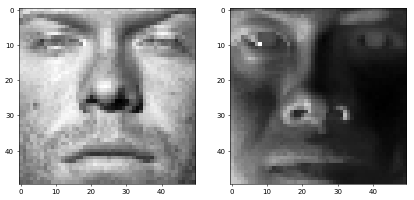

In [4]:
# 1.(d) Mean Substraction
# mean subtraction for train data
X_subtract_train= train_data-Average_face_train
plt.figure(figsize=(10,6),dpi=50)
plt.subplot(1,2,1)
plt.imshow(X_subtract_train[10,:].reshape(50,50),cmap=cm.Greys_r)

# mean subtraction for test data
X_subtract_test= test_data-Average_face_train
plt.subplot(1,2,2)
plt.imshow(X_subtract_test[10,:].reshape(50,50),cmap=cm.Greys_r)
plt.show()

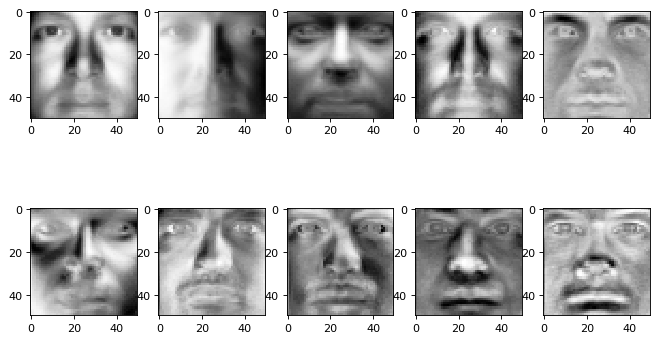

In [5]:
# 1.(e) Eigenface 
U, s, V = np.linalg.svd(X_subtract_train, full_matrices=True)
plt.figure(figsize=(10, 6), dpi=80)
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(V[i].reshape(50,50),cmap=cm.Greys_r)

In [6]:
# 1.(f) Low_rank Approximation
S=np.diag(s)

In [7]:
def rank_approx(U,S,V,r):
    X_test = np.dot(np.dot(U[:,:r],S[:r,:r]),V[:r,:])
    return X_test

In [8]:
def approx_error(index,index_array,X):
    error=[]
    U, s, V = np.linalg.svd(X, full_matrices=True)
    S=np.diag(s)
    for i in range(1,index):
        index_array.append(i)
        X_test = rank_approx(U,S,V,i)
        error.append(np.linalg.norm(X_test-X))
    return error

In [9]:
Index = []
Error = approx_error(201,Index,X_subtract_train)

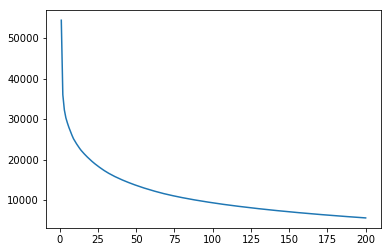

In [10]:
plt.plot(Index,Error)
plt.show()

In [11]:
# 1.(g) Eigenface Feature
def F(X,r):
    U, s, V = np.linalg.svd(X_subtract_train, full_matrices=True)
    f=np.dot(X,np.transpose(V[:r,:]))
    return f

In [12]:
F_train = F(X_subtract_train,10)
print(F_train.shape,X_subtract_train.shape)
F_test =F(X_subtract_test,10)
print(F_test.shape,X_subtract_test.shape)

(540, 10) (540, 2500)
(100, 10) (100, 2500)


In [13]:
# 1.(h) Face Recognition 
from sklearn.linear_model import LogisticRegression
ls = LogisticRegression(multi_class='ovr')
ls.fit(F_train,train_labels)
print(ls.score(F_test,test_labels))

0.79


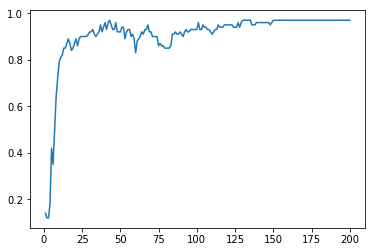

In [18]:
r=[]
ls_score=[]
U, s, V = np.linalg.svd(X_subtract_train, full_matrices=True)
for i in range(1,201):
    r.append(i)
    F_train = np.dot(X_subtract_train,np.transpose(V[:i,:]))
    F_test =np.dot(X_subtract_test,np.transpose(V[:i,:]))
    ls.fit(F_train,train_labels)
    ls_score.append(ls.score(F_test,test_labels))
plt.plot(r,ls_score)
plt.show()